In [1]:
import { launch, ElementHandle } from "../src/deps.ts"
import { compare } from "../src/compare.ts"
import { $frame } from "../src/$frame.ts"
import { pipe } from "https://denopkg.com/gnlow/pipe@0.1.0/mod.ts"

await using browser = await launch({ headless: true })

let enz: Uint8Array, ent: Uint8Array

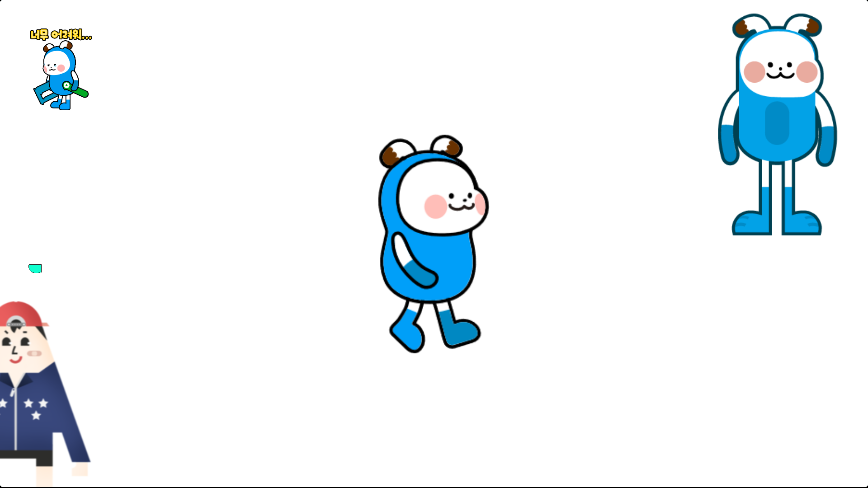

In [2]:
{
    await using page = await browser.newPage("https://enz.deno.dev/p/652371adb7aa680135cc2070")

    await page.waitForSelector("canvas")

    enz = await page.$("canvas").then(x => x?.screenshot()!)
}

undefined


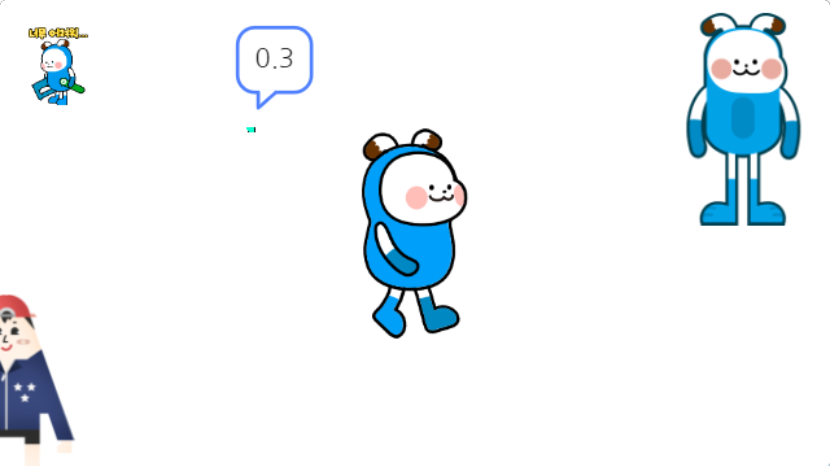

In [3]:
{
    await using page = await browser.newPage("https://playentry.org/project/652371adb7aa680135cc2070")

    await page.waitForSelector("iframe")
    const frame = await $frame("iframe")(page)

    console.log(await frame.innerHTML())

    await frame.waitForSelector("canvas")

    await frame.$(".entryRunButtonBigMinimize").then(x => x?.click())

    ent = await frame.$("canvas").then(x => x?.screenshot()!)
}

4380


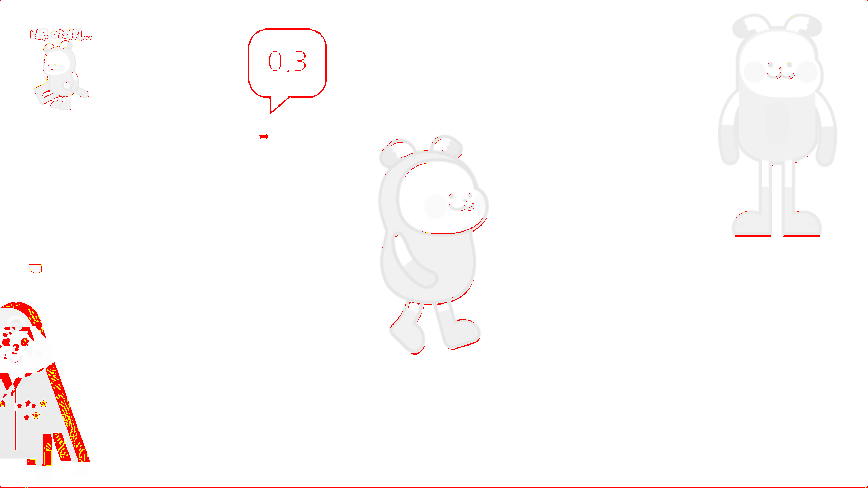

In [11]:
import sharp from "npm:sharp@0.34.3"
const { diff, count } = await compare(enz, ent, { threshold: 0.5 })

console.log(count)
diff

In [5]:
await Promise.all(
    browser.pages.map(x => x.close())
)

[]